## 1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

### (a) What problem does a Classification Decision Tree address?

A Classification Decision Tree is a supervised machine learning algorithm used to solve classification problems, where the goal is to categorize data points into predefined classes or groups based on their features. It creates a tree-like structure where each internal node represents a decision based on a feature, and each leaf node represents a class label.

Real-world applications:

Medical Diagnosis: Predicting whether a patient has a specific disease (e.g., diabetes) based on features like blood pressure, glucose levels, and BMI.

Spam Detection: Classifying emails as spam or not spam based on features such as the presence of specific words or sender information.

Credit Risk Assessment: Determining whether a loan applicant is a high or low credit risk based on financial history, income, and employment details.

Customer Segmentation: Categorizing customers into groups like "potential buyers" or "non-buyers" for targeted marketing campaigns.

Fraud Detection: Identifying fraudulent transactions by analyzing patterns in payment data.


### (b) Differences between Classification Decision Trees and Multiple Linear Regression

#### 1. Nature of the Task

Classification Decision Tree: Predicts categorical outcomes (e.g., "yes" or "no", "cat", "dog", or "bird").
    
Multiple Linear Regression: Predicts continuous outcomes (e.g., house price, temperature, or sales revenue).

#### 2. How Predictions are Made

Classification Decision Tree:
    
Splits data into branches based on decision rules derived from feature values.

Multiple Linear Regression:
    
Creates a mathematical equation that models the relationship between independent variables 𝑋 and the dependent variable 𝑌.

#### 3. Structure of the Model

Classification Decision Tree: Non-parametric, hierarchical structure (tree).

Multiple Linear Regression: Parametric, single linear equation.

#### 4. Handling Data

Classification Decision Tree: Handles categorical and numerical data without transformation.

Multiple Linear Regression: Requires numerical data or one-hot encoding for categorical data.

#### Example Scenario:

Imagine predicting whether a customer will make a purchase:

Using a Classification Decision Tree, the algorithm asks "yes/no" questions (e.g., "Is their income > $50,000?") and classifies them as "likely to buy" or "unlikely to buy."

Using Multiple Linear Regression, the algorithm predicts a probability score or dollar amount of purchase but requires additional conversion to classify the result.

## 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

### 1.Accuracy measures the proportion of true results (both true positives and true negatives) in the population.

#### Real-World Applications Where Accuracy is Suitable

#### 1. Spam Detection

Reason:

In spam email detection, most emails are usually legitimate, with only a small proportion being spam. If the costs of misclassification (e.g., marking spam as legitimate or legitimate as spam) are similar, accuracy can effectively measure the overall performance of the model.

#### 2. Image Classification

Reason:

For example, identifying whether an image contains a specific object (e.g., a cat). If the dataset is balanced (similar numbers of images with and without cats), accuracy serves as a straightforward and effective metric to evaluate the model's classification performance.

#### 3.Exam Pass/Fail Prediction

Reason:

If the task is to predict whether students will pass an exam, and the proportion of passing and failing students is roughly equal, accuracy is an effective metric to evaluate the model's predictive capability.

####  Core Reasons for Applicability

Balanced Class Distribution: When each class is represented equally in the dataset, accuracy is a reliable metric.

Similar Misclassification Costs: When the costs of false positives and false negatives are not significantly different, accuracy provides a clear assessment of overall performance.

Simple Task Nature: For binary or multi-class classification tasks with clear objectives, accuracy provides an intuitive measure of correctness.

### 2. Sensitivity measures the proportion of actual positives that are correctly identified.

#### Real-World Applications Where Sensitivity (Recall) is Suitable

#### 1. Disease Diagnosis

Reason:

In healthcare, especially for detecting rare or severe diseases (e.g., cancer or HIV), the cost of missing a diagnosis (false negatives) is extremely high. Sensitivity ensures that as many actual patients as possible are identified, even if it results in some false positives.

#### 2. Fraud Detection

Reason:

Fraudulent activities in financial transactions are usually rare but can result in significant economic losses. High sensitivity ensures that most fraudulent activities are flagged, even if it requires further review of some false positives.

#### 3. Disaster Warning Systems

Reason:

When predicting natural disasters (e.g., hurricanes, earthquakes, or floods), missing a potential disaster (false negative) can have catastrophic consequences. High sensitivity ensures most threats are detected and warnings are issued promptly to minimize harm.

#### Core Reasons for Applicability

High Cost of False Negatives:

Sensitivity is crucial in scenarios where missing a true positive case leads to severe consequences, such as in healthcare, finance, or safety.

Imbalanced Class Distribution:

When the positive class (e.g., diseases or fraud cases) is rare, sensitivity becomes a vital measure of a model's ability to capture these critical instances.

Allowance for Post-Verification:

In scenarios like medical diagnostics or warning systems, false positives (which sensitivity does not penalize) can be addressed through additional verification, making sensitivity a valuable metric.



### 3. Specificity measures the proportion of actual negatives that are correctly identified.

#### 1. Facial Recognition Systems

Reason:

In facial recognition, specificity helps reduce the chances of falsely identifying non-target individuals. High specificity ensures the system accurately identifies authorized users and avoids mistakenly identifying others as legitimate.


#### 2. Credit Card Fraud Detection

Reason:

In credit card fraud detection, specificity helps reduce the number of legitimate transactions being incorrectly flagged as fraud. Reducing false positives (legitimate transactions marked as fraudulent) is important for maintaining customer experience and minimizing unnecessary investigation costs.

#### Core Reasons for Applicability

Minimizing False Positives:

Specificity is suitable for scenarios where it is important to avoid classifying normal instances as anomalies, especially in healthcare, finance, and security, where false positives may lead to unnecessary interventions or costs.

Imbalanced Data Scenarios:

When the negative class (e.g., healthy individuals, legitimate transactions) is much larger than the positive class, specificity is an effective metric for assessing a model's ability to correctly identify normal cases.

Avoiding Over-Intervention:

Specificity is useful in scenarios where falsely identifying normal cases as abnormal can lead to unnecessary interventions, such as in medical tests, legal actions, or customer dissatisfaction.

### 4. Precision measures the proportion of positive identifications that were actually correct.

#### Recommendation Systems

Reason:

In recommendation systems, precision ensures that the content recommended to users is relevant to their interests. If irrelevant items are recommended (false positives), users may become dissatisfied and reduce their usage. High precision indicates that the system accurately identifies items the user is likely to be interested in, improving user experience.

#### Core Reasons for Applicability

Minimizing False Positives:

Precision is useful in scenarios where misclassifying something as positive has serious consequences, especially in fields like finance, healthcare, and information retrieval.

Ensuring Relevance of Results:

When it is important to ensure that the model's output is highly aligned with actual outcomes, precision plays a key role. For example, in recommendation systems or search engines, we want to ensure that the results provided to users are relevant and valuable.

Avoiding Irrelevant Results Impacting User Experience:

Precision is suitable in applications where providing irrelevant results significantly impacts user experience or increases costs, such as spam filtering or recommendation systems.



## 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

### 1.remove Weight_oz, Width, and Height


### 2.drop all remaining rows with NaN entries
### 3.set Pub year and NumPages to have the type int, and Hard_or_Paper to have the type category

Once these steps are complete, we'll perform some standard EDA to understand the structure and summary statistics of the data.

Here's the code that follows the instructions:

/tmp/ipykernel_52/1810859831.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = pd.to_numeric(ab_reduced_noNaN['NumPages'], errors='coerce')
/tmp/ipykernel_52/1810859831.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = pd.to_numeric(ab_reduced_noNaN['Pub year'], errors='coerce')



Correlation Matrix:
              List Price  Amazon Price  NumPages  Pub year     Thick
List Price      1.000000      0.955262  0.205665  0.140999  0.143399
Amazon Price    0.955262      1.000000  0.131343  0.085508  0.037506
NumPages        0.205665      0.131343  1.000000  0.246888  0.808662
Pub year        0.140999      0.085508  0.246888  1.000000  0.318464
Thick           0.143399      0.037506  0.808662  0.318464  1.000000


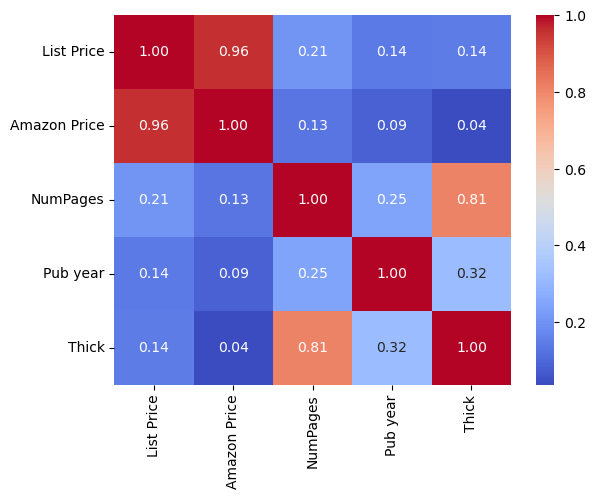

In [5]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove columns Weight_oz, Width, and Height
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Step 2: Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna(axis=0)

# Step 3: Ensure 'NumPages' and 'Pub year' are numeric
# First, remove any non-numeric characters that might have caused the issue
ab_reduced_noNaN['NumPages'] = pd.to_numeric(ab_reduced_noNaN['NumPages'], errors='coerce')
ab_reduced_noNaN['Pub year'] = pd.to_numeric(ab_reduced_noNaN['Pub year'], errors='coerce')

# Drop rows that still have NaN values after conversion
ab_reduced_noNaN = ab_reduced_noNaN.dropna(subset=['NumPages', 'Pub year'])

# Step 4: Convert 'Hard_or_Paper' to a categorical type
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype('category')

# Step 5: Filter only numeric columns for correlation
numeric_columns = ab_reduced_noNaN.select_dtypes(include=['number']).columns

# Step 6: Calculate the correlation matrix using only numeric columns
correlation_matrix = ab_reduced_noNaN[numeric_columns].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Optionally, you can visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## 4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

## Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model

In [6]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

### Code to create an 80/20 split:

In [7]:
from sklearn.model_selection import train_test_split

# Perform 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations in the training and test sets
print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the testing set: {len(ab_reduced_noNaN_test)}")

Number of observations in the training set: 255
Number of observations in the testing set: 64


Number of observations in the training set: 255

Number of observations in the testing set: 64

### Understanding the Two Steps:

In [8]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

What it's doing:
This line is converting the Hard_or_Paper categorical column into a binary format using one-hot encoding. pd.get_dummies creates a DataFrame with two columns: one for "Hard" and one for "Paper". The ['H'] part selects the column that represents whether a book is a "Hard" cover book (1 if it's a hard cover, 0 otherwise). This will be the target variable (y) for the classification task, indicating whether a book is a hard cover or not.

In [9]:
X = ab_reduced_noNaN[['List Price']]

What it's doing:
This line is selecting the List Price column as the feature (X) that will be used to predict whether a book is a hard cover or paper back book. Essentially, you're using the price of the book to predict whether it is hardcover or paperback.

### Training the Classification Tree
To train a DecisionTreeClassifier model using List Price to predict whether a book is hardcover or paperback with a max_depth of 2, we can use the following steps:

### Code to Train the Model

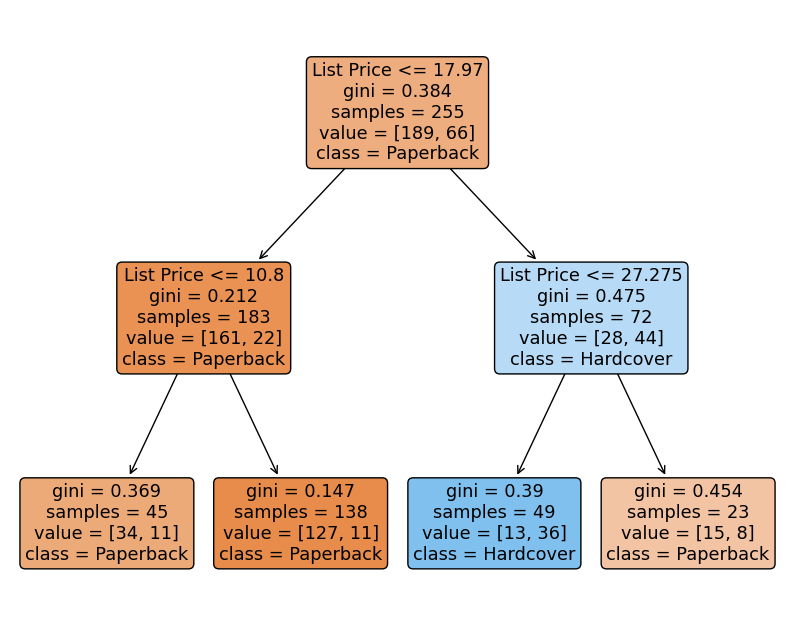

Test Accuracy: 0.84


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Create the target variable y (Hard cover vs Paper back)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Create the feature matrix X (using List Price)
X = ab_reduced_noNaN[['List Price']]

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with max_depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], rounded=True)
plt.show()

# Print the accuracy on the test data
print(f"Test Accuracy: {clf.score(X_test, y_test):.2f}")

### Explanation of the Tree

After you run the code, you will see a decision tree visualization, which shows how List Price is used to make predictions. The decision tree will split the data based on List Price into two groups (depending on the threshold chosen by the tree at each node). If the price is higher than a certain value, it might predict "Hardcover"; otherwise, it might predict "Paperback."

The max_depth=2 parameter ensures the tree has at most two levels, which means there will be at most one decision split after the root node.

## 5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

max_depth set to 4

We'll use the specified features 'NumPages', 'Thick', and 'List Price', and set the max_depth parameter to 4 for the decision tree model.

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Prepare features and target
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN['Hard_or_Paper'])['H']

# Train the decision tree model with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4)
clf2.fit(X, y)

DecisionTreeClassifier(max_depth=4)

Now that the model (clf2) is trained, we can visualize the tree using tree.plot_tree(). This will show how the decision tree uses 'NumPages', 'Thick', and 'List Price' to make predictions about whether the book is a hard cover or paperback.

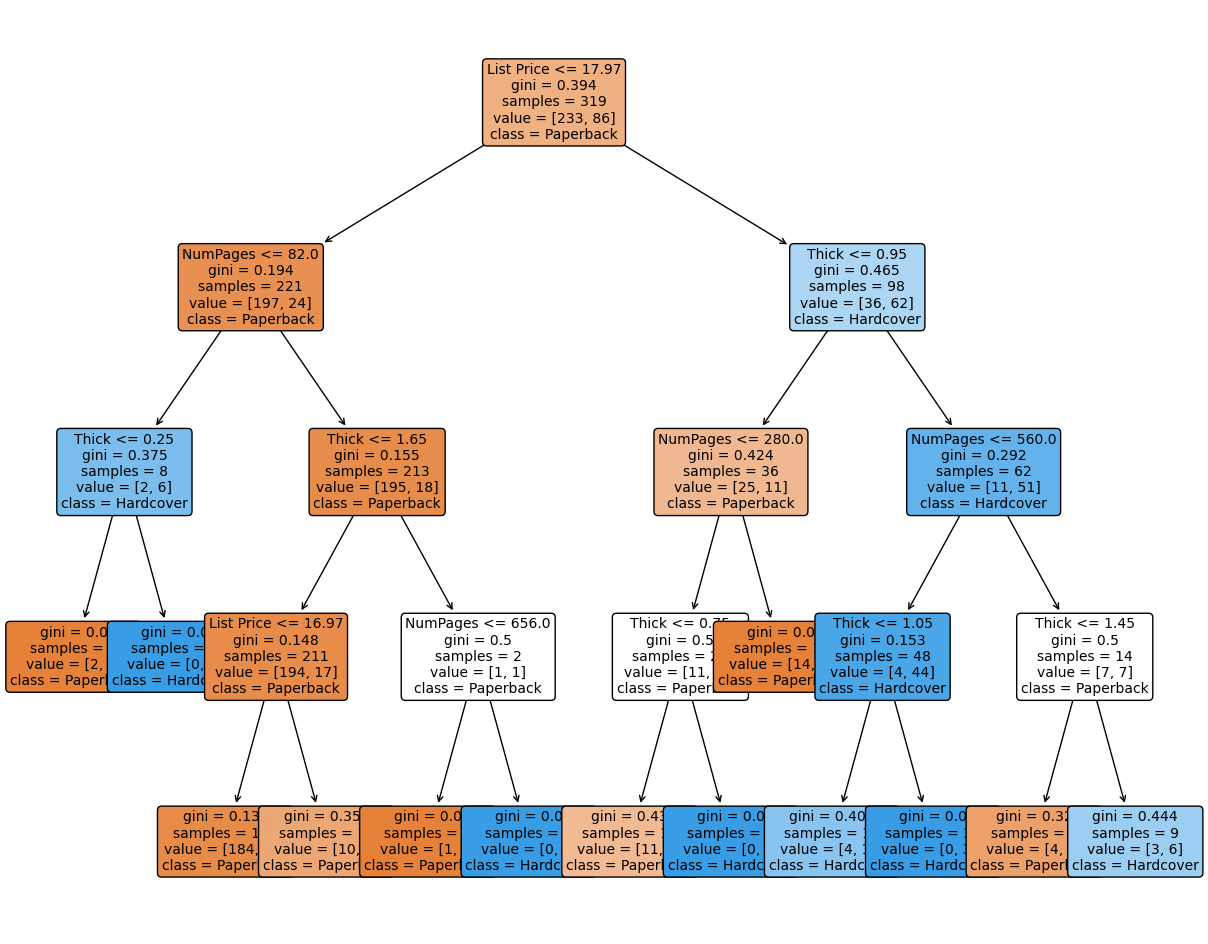

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the decision tree
plt.figure(figsize=(15, 12))
tree.plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], rounded=True, fontsize=10)
plt.show()

### Explanation of How Predictions Are Made for clf2

1.Root Node: The decision tree starts by considering all the observations (data points) and splits them based on the features. The first decision is based on the feature that best separates the data (i.e., the one with the highest information gain or lowest impurity). In this case, the first feature chosen at the root node will likely be one of 'NumPages', 'Thick', or 'List Price'.

2.Internal Nodes: At each internal node (non-leaf node), the decision tree uses one of the three features ('NumPages', 'Thick', or 'List Price') to split the data. The split is based on a condition like:

NumPages <= 200

Thick > 2.5

List Price <= 30

The tree checks the condition and splits the data accordingly. For example, if NumPages <= 200, it might go to one child node; if not, it might go to another child node.

3.Leaf Nodes: When the data reaches a leaf node, the tree makes a prediction. The prediction is the most common class (either "Paperback" or "Hardcover") among the samples in that node. If a majority of the samples in a leaf node are hardcovers, then the tree will predict "Hardcover" for any new data point that reaches that leaf.

4.How Multiple Features Work Together: In this case, the tree might combine conditions on multiple features to make the classification. For example:

If NumPages > 250 and Thick <= 2.5, it might predict "Hardcover."

If List Price <= 20 and NumPages <= 200, it might predict "Paperback."

5.Max Depth and Prediction Path: The tree is limited to a max_depth=4, so it will have at most 4 levels of splits. This means that the model considers at most 4 features' conditions when classifying the book.

### General Prediction Process:

For a new data point, the prediction process follows these steps:

Starting at the root, the tree evaluates the first condition (e.g., List Price <= 20).

Based on the condition, the model moves to the left or right child node.

This process continues down the tree, evaluating conditions at each node until it reaches a leaf node.

Once a leaf node is reached, the model assigns the class label (e.g., "Paperback" or "Hardcover") based on the majority class of the data points in that leaf.

This is how the clf2 model uses multiple features ('NumPages', 'Thick', and 'List Price') and splits based on them to classify whether a book is a hardcover or paperback.

## 6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models


To compute and report the sensitivity, specificity, and accuracy for both the clf and clf2 models on the test dataset (ab_reduced_noNaN_test), we will follow these steps:

1.Make predictions using both models (clf and clf2) on the test data.

2.Calculate the confusion matrix for each model.

3.Compute the sensitivity, specificity, and accuracy from the confusion matrix.

Here's the code that accomplishes this:

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Step 1: Make predictions using both models on the test set
y_test = pd.get_dummies(ab_reduced_noNaN_test['Hard_or_Paper'])['H']
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Features used in clf2

# For clf (List Price only)
y_pred_clf = clf.predict(ab_reduced_noNaN_test[['List Price']])

# For clf2 (NumPages, Thick, List Price)
y_pred_clf2 = clf2.predict(X_test)

# Step 2: Calculate confusion matrices for both models
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Step 3: Calculate sensitivity, specificity, and accuracy for clf
# Sensitivity = TP / (TP + FN)
# Specificity = TN / (TN + FP)
# Accuracy = (TP + TN) / (TP + TN + FP + FN)

def calculate_metrics(cm):
    TP = cm[1, 1]  # True Positives
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives

    # Sensitivity
    sensitivity = TP / (TP + FN)
    
    # Specificity
    specificity = TN / (TN + FP)
    
    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return sensitivity, specificity, accuracy

# Calculate metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)

# Calculate metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# Report the results
print(f"Metrics for clf (List Price only):")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")
print(f"Accuracy: {accuracy_clf:.4f}")

print(f"\nMetrics for clf2 (NumPages, Thick, List Price):")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")
print(f"Accuracy: {accuracy_clf2:.4f}")

Metrics for clf (List Price only):
Sensitivity: 0.7000
Specificity: 0.9091
Accuracy: 0.8438

Metrics for clf2 (NumPages, Thick, List Price):
Sensitivity: 0.9000
Specificity: 0.9545
Accuracy: 0.9375


#### Metrics for clf (List Price only):
    
Sensitivity: 0.7000: This means the model correctly identifies 70% of the actual positive cases (i.e., books that are hardcovers).
        
Specificity: 0.9091: This indicates the model correctly identifies 91% of the actual negative cases (i.e., books that are paperback).
        
Accuracy: 0.8438: Overall, the model correctly classifies 84.38% of all instances.

#### Metrics for clf2 (NumPages, Thick, List Price):

Sensitivity: 0.9000: This model is more effective at identifying the true positives, correctly classifying 90% of hardcover books.

Specificity: 0.9545: It also does an excellent job of identifying the true negatives, with 95.45% accuracy for identifying paperback books.

Accuracy: 0.9375: This model achieves a higher overall accuracy of 93.75%, indicating that using multiple features (NumPages, Thick, List Price) leads to a better classification performance.

#### Key Takeaways:

Improvement with clf2: The second model (clf2) benefits from the additional features (NumPages and Thick), showing better sensitivity, 
specificity, and accuracy compared to clf (which only used List Price).

Sensitivity: clf2 shows a significant improvement in sensitivity, meaning it is better at detecting hardcover books.

Specificity: clf2 also performs better in specificity, so it is more accurate in identifying paperback books as well.

Accuracy: Overall, clf2 provides a better classification result, likely because it has more relevant features to distinguish between hardcover and paperback books.

## 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

In [ ]:
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
                     
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The difference between these two confusion matrices arises from the features used to train the models and how these features affect classification accuracy. The second confusion matrix uses more features compared to the first one, and this additional information allows the model to make more accurate decisions, thereby reducing misclassifications.

The confusion matrices for clf and clf2 perform better because they use multiple features, providing a more comprehensive understanding of the data, which improves accuracy, sensitivity, and specificity. This enables the model to make more precise predictions, especially in distinguishing between hardcover and paperback books.

## 8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

To visualize feature importances in a scikit-learn classification decision tree, you can use the feature_importances_ attribute of the fitted model. This attribute provides the importance of each feature in the decision tree model, with higher values indicating more important features. To visualize this, we can use a bar plot.

Here's the code to visualize the feature importances for clf2 and report the most important predictor variable:

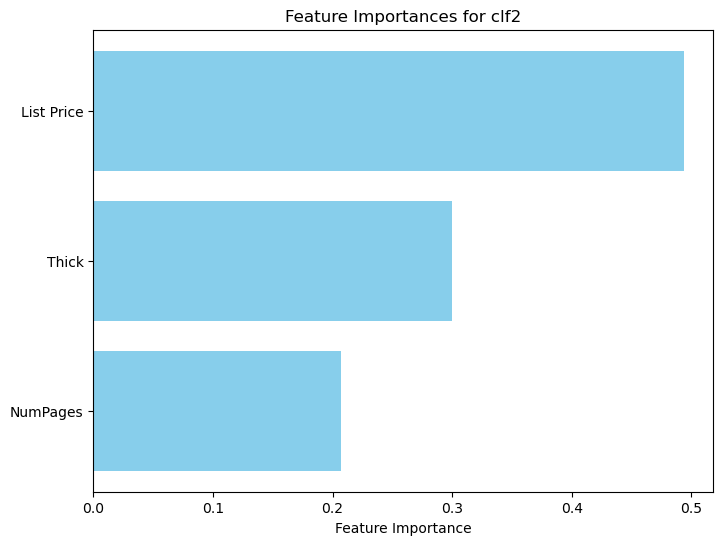

The most important predictor variable for making predictions is: List Price


In [15]:
import matplotlib.pyplot as plt

# Get feature importances and feature names
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar plot to visualize feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances for clf2')
plt.show()

# Report the most important feature
most_important_feature = feature_names[importances.argmax()]
print(f"The most important predictor variable for making predictions is: {most_important_feature}")

The results indicate that the List Price variable has the highest feature importance (0.5), followed by Thick (0.3), and then NumPages (0.2). This means that, according to the clf2 model, List Price is the most influential feature in predicting whether a book is a hardcover or paperback, with Thick and NumPages being relatively less important in the decision-making process.

In summary:

List Price (0.5): Most important predictor for classifying a book.

Thick (0.3): Second in importance, also contributing significantly.

NumPages (0.2): The least important, but still contributing to the predictions.

## 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

In a linear regression model, the coefficients represent the relationship between each predictor variable and the target variable (such as magnitude and direction), indicating how much the target variable is expected to change when a predictor variable changes by one unit.

In decision trees, feature importance represents the relative contribution of each feature to the prediction, measuring how much each feature reduces uncertainty or impurity (e.g., Gini index or entropy) at each split.

In linear regression, the coefficients reflect a direct linear relationship, while in decision trees, feature importance measures how well a feature helps the model make accurate splits.

## 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

No.

## Summary

### Classification Decision Trees:
We discussed how classification decision trees help in solving classification problems, such as predicting categories like "hardcover" or "paperback" for books based on features like "List Price". These trees make predictions by splitting data at each node based on the best feature to reduce impurity, and they are easy to visualize.

### Metrics for Model Evaluation:
We explored various performance metrics like sensitivity, specificity, and accuracy in evaluating classification models. Sensitivity measures the proportion of true positives correctly identified, specificity measures the true negatives, and accuracy is the overall percentage of correct predictions.

### Confusion Matrix Analysis:
We compared confusion matrices for models with different features and found that models using more features (like "NumPages", "Thick", and "List Price") performed better in terms of accuracy and sensitivity, as they were able to make more accurate predictions.

### Feature Importance in Decision Trees:
We discussed the concept of feature importance in decision trees, where the most significant variables (like "List Price") have higher feature importance values. These features are key in splitting the data and making accurate predictions.

### Coefficients vs. Feature Importance:
We explored the difference between interpreting coefficients in linear regression models and feature importances in decision trees. Coefficients in linear regression reflect the direct relationship between predictors and the outcome variable, while feature importance in decision trees indicates how much a feature contributes to reducing uncertainty in predictions.

### Model Training and Testing:
We discussed training decision trees using specific features and evaluating their performance on a test dataset. The models' performance was assessed using confusion matrices and metrics like sensitivity, specificity, and accuracy, with improvements seen when multiple features were used in the model.

https://chatgpt.com/share/673fa04b-a5a0-8007-9997-29513d9f2e29